In [1]:
#Hierarchical Clustering Classification
#https://www.datasciencelearner.com/how-to-do-hierarchical-clustering-in-python/
import pandas as pd
import numpy as np

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import sklearn.metrics as sm
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as shc 

In [2]:
dataset = pd.read_csv("data_test_two.csv")

In [3]:
dataset.shape

(1000, 31)

In [4]:
dataset.head()

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,...,6.820536,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933,blues
1,blues.00001.wav,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,...,2.653106,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985,blues
2,blues.00002.wav,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,...,4.730809,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005,blues
3,blues.00003.wav,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,...,5.116895,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267,blues
4,blues.00004.wav,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,...,-6.884247,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891,blues


In [5]:
X = dataset.drop(['Filename','label'],axis=1) #Filename is not required
X

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,-188.432709,...,-3.841403,6.820536,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933
1,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,-286.279358,...,-0.362909,2.653106,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985
2,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,-166.067474,...,-11.016151,4.730809,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005
3,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,-274.509918,...,2.314332,5.116895,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267
4,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,-236.730896,...,-12.304211,-6.884247,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.312390,0.066186,30.688717,1581.409638,0.000851,1869.828399,-0.023475,3382.146215,0.066453,-213.803162,...,-9.517272,10.248952,-10.964746,2.161331,-8.731913,-1.181509,-12.371817,0.345473,-4.355881,-3.619780
996,0.346445,0.060734,30.686908,1681.291780,0.001022,1862.853262,-0.012933,3389.512837,0.079978,-197.906128,...,-11.021044,12.340167,-15.811428,2.499770,-1.465077,0.332790,-10.561275,-1.007160,-6.957969,-6.305751
997,0.366349,0.060549,30.018262,1804.013421,0.001316,1780.175455,-0.002448,3556.861825,0.103779,-182.421631,...,-14.521241,7.016281,-16.999731,-3.583634,-11.462903,-2.264517,-12.694439,-0.091419,-12.558615,-6.974419
998,0.327993,0.071812,29.785034,1043.976973,0.000185,1540.514360,0.022385,2149.253670,0.036334,-285.730743,...,-5.831606,5.101926,-8.858630,-3.481705,-4.420999,-5.908291,-2.952532,0.013109,-4.228845,-5.788094


In [6]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [7]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [8]:
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10
sb.set_style("whitegrid")

In [9]:
#scale the data
#data = scale(X)
#target = pd.DataFrame(X)
#variable_names = X
#data[0:10]
#From here down: https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/
data = scale(X_principal)
target = pd.DataFrame(X_principal)
variable_names = X_principal
data[0:10]

#Can be up to 999

array([[-0.7698,  0.0923],
       [-1.1489,  0.7358],
       [-0.5314, -1.6053],
       [-1.411 ,  1.1349],
       [-0.7506, -1.3526],
       [-1.013 , -1.5714],
       [-1.1858, -1.16  ],
       [-1.1503, -1.141 ],
       [-0.0667, -0.2625],
       [-1.3855, -0.3596]])

In [10]:
X_principal

,P1,P2
0,-0.406561,0.036006
1,-0.606777,0.287088
2,-0.280681,-0.626318
3,-0.745234,0.442802
4,-0.396421,-0.527744
...,...,...
995,0.123715,-0.646985
996,0.168953,-0.709138
997,0.207862,-0.814404
998,-0.576760,-0.164768


In [11]:
z = linkage(X_principal,"ward")

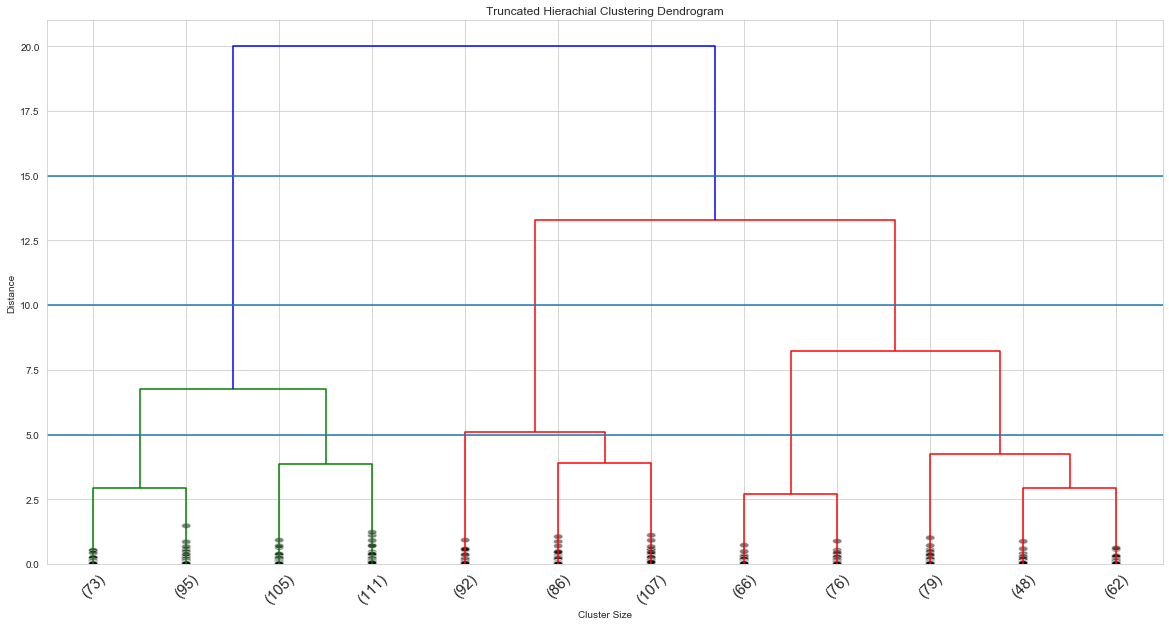

In [12]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

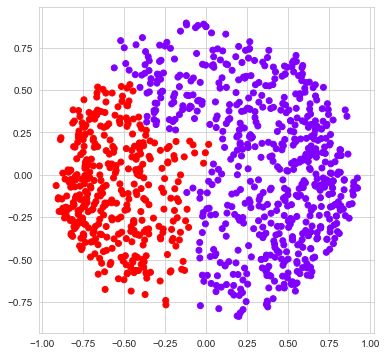

In [14]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

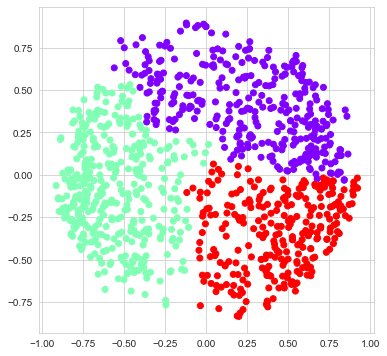

In [15]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

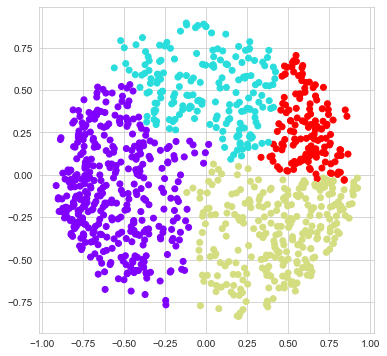

In [16]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

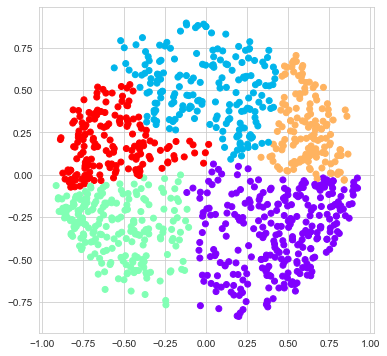

In [17]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

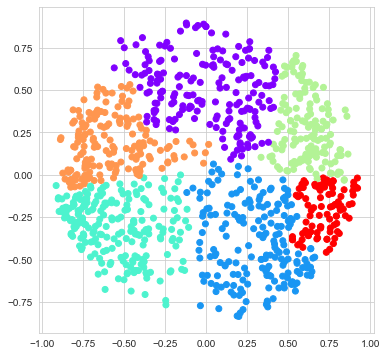

In [18]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

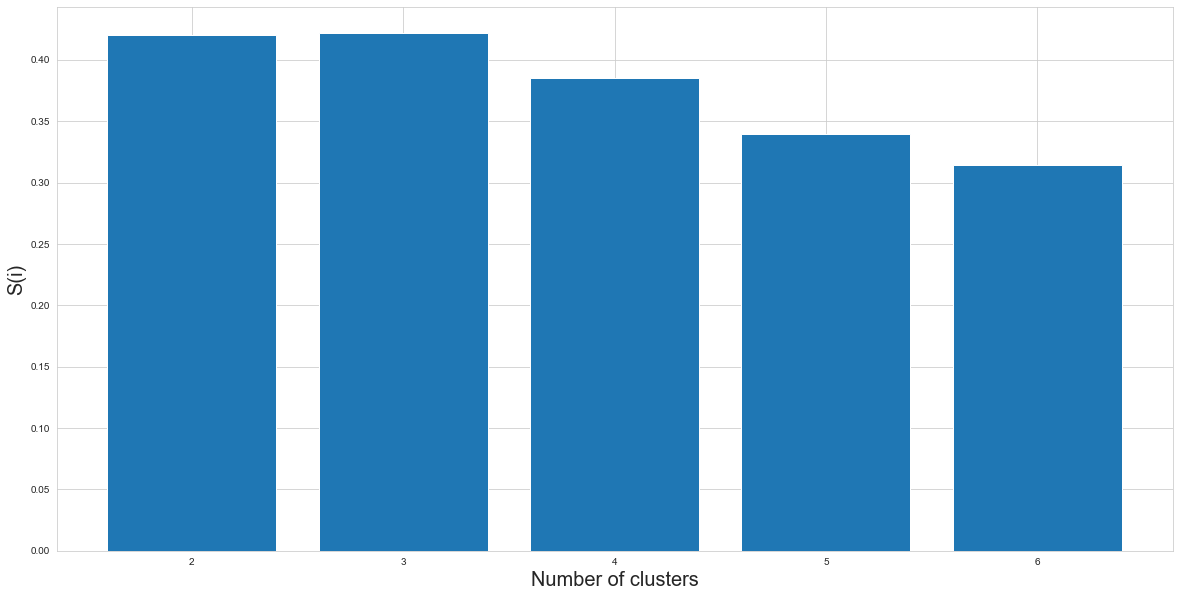

In [19]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 